EXPLORATORY DATA ANALYSIS

In [36]:
##Import Libraries##
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [37]:
##Load dataset##
df=pd.read_csv("country_profile_nigeria .csv")
##Preview dataset##
df.head(5)

,Diseases & Risk Factors,Indicator Name,Cancer Type,Year,Country Name,Region,Gender,Area,Numeric,Lower Confidence Limit,Upper Confidence Limit,Comment,Unnamed: 12
0,Noncommunicable diseases,Probability of premature mortality from NCDs,NaN,2000,Nigeria,African Region,Total,NaN,21,no data,no data,NaN,NaN
1,Noncommunicable diseases,Probability of premature mortality from NCDs,NaN,2000,Nigeria,African Region,Males,NaN,23,no data,no data,NaN,NaN
2,Noncommunicable diseases,Probability of premature mortality from NCDs,NaN,2000,Nigeria,African Region,Females,NaN,19,no data,no data,NaN,NaN
3,Noncommunicable diseases,Probability of premature mortality from NCDs,NaN,2001,Nigeria,African Region,Total,NaN,21,no data,no data,NaN,NaN
4,Noncommunicable diseases,Probability of premature mortality from NCDs,NaN,2001,Nigeria,African Region,Males,NaN,23,no data,no data,NaN,NaN


In [38]:
##check the shape##
df.shape

(6460, 13)

In [39]:
##Check column names##
df.columns

Index(['Diseases & Risk Factors', 'Indicator Name', 'Cancer Type', 'Year',
       'Country Name', 'Region', 'Gender', 'Area', 'Numeric',
       'Lower Confidence Limit', 'Upper Confidence Limit', 'Comment',
       'Unnamed: 12'],
      dtype='object')

In [40]:
##Rename columns##
df.rename(columns={'Diseases & Risk Factors': 'disease_risk_factor', 'Indicator Name': 'indicator_name', 'Cancer Type': 'cancer_type', 'Year': 'year',
       'Country Name': 'country_name', 'Region': 'region', 'Gender':'gender', 'Area':'area', 'Numeric':'numeric',
       'Lower Confidence Limit':'lcl', 'Upper Confidence Limit':'ucl', 'Comment':'comment'}, inplace=True)

In [41]:
##Check for missing values##
df.isnull().sum()

disease_risk_factor       0
indicator_name            0
cancer_type            6400
year                      0
country_name              0
region                    0
gender                  281
area                   6330
numeric                   0
lcl                     157
ucl                     157
comment                6310
Unnamed: 12            6460
dtype: int64

In [42]:
##drop columns##
df= df.drop(columns=['cancer_type', 'area', 'comment', 'Unnamed: 12','region', 'country_name'])

In [43]:
## droping missing values from columns##
df=df.dropna(subset=['gender', 'lcl', 'ucl'])

In [44]:
##recheck shape##
df.shape

(6173, 7)

In [45]:
##recheck missing values##
df.isnull().sum()

disease_risk_factor    0
indicator_name         0
year                   0
gender                 0
numeric                0
lcl                    0
ucl                    0
dtype: int64

In [46]:
##check datatypes##
df.dtypes

disease_risk_factor    object
indicator_name         object
year                   object
gender                 object
numeric                object
lcl                    object
ucl                    object
dtype: object

In [47]:
##converting columns to numeric###
df['numeric']=pd.to_numeric(df['numeric'], errors='coerce')
df['lcl']=pd.to_numeric(df['lcl'], errors='coerce')
df['ucl']=pd.to_numeric(df['ucl'], errors='coerce')

In [48]:
##converting "year" to integer##
df['year']=pd.to_numeric(df['year'], errors='coerce').astype('int64')

In [49]:
##recheck data types##
df.dtypes

disease_risk_factor     object
indicator_name          object
year                     int64
gender                  object
numeric                float64
lcl                    float64
ucl                    float64
dtype: object

In [50]:
##drop duplicates##
df.drop_duplicates(inplace=True)

In [51]:
##view unique values##
print('DRF:',df['disease_risk_factor'].unique())
print('YR:',df['year'].unique())
print('GEN:',df['gender'].unique())

DRF: ['Noncommunicable diseases' 'Air pollution' 'Harmful Alcohol Use' 'Cancer'
 'Chronic respiratory diseases' 'Cardiovascular diseases' 'Diabetes'
 'Obesity/unhealthy diet' 'Physical inactivity' 'Tobacco Use']
YR: [2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017 2018 2019 2020 2021 2022]
GEN: ['Total' 'Males' 'Females']


In [52]:
##removing gender = 'Total'##
df=df[df['gender'] != 'Total']

OBESITY/OVERWEIGHT DATA ANALYSIS

In [53]:
##filter for obesity/unhealthy indicators##
obesity_df=df[df['disease_risk_factor'].str.contains('Obesity/unhealthy diet', case=False, na=False)]

In [54]:
##indicator names in obesity dataframe##
print(obesity_df['indicator_name'].unique())

['Total NCD deaths' 'Number of deaths due to cardiovascular diseases'
 'Number of deaths due to diabetes' 'NCD age-standardized death rate'
 'CVD age-standardized death rate' 'Diabetes age-standardized death rate'
 'Overweight, adults aged 18+' 'Obesity, adults aged 18+'
 'Overweight, adolescents aged 10–19' 'Obesity, adolescents aged 10–19'
 'Overweight, children aged 5–9' 'Obesity, children aged 5–9'
 'Mean population salt intake, adults aged 25+']


In [55]:
##check column names##
obesity_df.columns

Index(['disease_risk_factor', 'indicator_name', 'year', 'gender', 'numeric',
       'lcl', 'ucl'],
      dtype='object')

In [56]:
##check shape##
obesity_df.shape

(560, 7)

In [57]:
##check data type##
obesity_df.dtypes

disease_risk_factor     object
indicator_name          object
year                     int64
gender                  object
numeric                float64
lcl                    float64
ucl                    float64
dtype: object

In [58]:
##check for missing values##
obesity_df.isnull().sum()

disease_risk_factor      0
indicator_name           0
year                     0
gender                   0
numeric                  0
lcl                    284
ucl                    284
dtype: int64

In [59]:
##drop 'lcl' and 'ucl' columns##
obesity_df=obesity_df.drop(columns=['lcl', 'ucl'])

In [60]:
##preview the dataset##
obesity_df.head(5)

,disease_risk_factor,indicator_name,year,gender,numeric
4734,Obesity/unhealthy diet,Total NCD deaths,2000,Males,162558.6736
4735,Obesity/unhealthy diet,Total NCD deaths,2000,Females,144848.0875
4737,Obesity/unhealthy diet,Total NCD deaths,2001,Males,169680.8650
4738,Obesity/unhealthy diet,Total NCD deaths,2001,Females,150199.8640
4740,Obesity/unhealthy diet,Total NCD deaths,2002,Males,170638.9734


In [61]:
##count unique values in 'indicator_name' column##
obesity_df['indicator_name'].value_counts()

indicator_name
Overweight, adults aged 18+                        46
Obesity, adults aged 18+                           46
Overweight, adolescents aged 10–19                 46
Obesity, adolescents aged 10–19                    46
Overweight, children aged 5–9                      46
Obesity, children aged 5–9                         46
Mean population salt intake, adults aged 25+       44
Total NCD deaths                                   40
Number of deaths due to cardiovascular diseases    40
Number of deaths due to diabetes                   40
NCD age-standardized death rate                    40
CVD age-standardized death rate                    40
Diabetes age-standardized death rate               40
Name: count, dtype: int64


DESCRIPTIVE ANALYSIS


Obesity & Overweight Trends 

In [62]:
# filter for obesity/overweight indicators for adults#
adult_df = obesity_df[obesity_df['indicator_name'].isin([
    'Overweight, adults aged 18+',
    'Obesity, adults aged 18+'
])]

In [63]:
# group by year and indicator#
trend_df = adult_df.groupby(['year', 'indicator_name'])['numeric'].mean().reset_index()

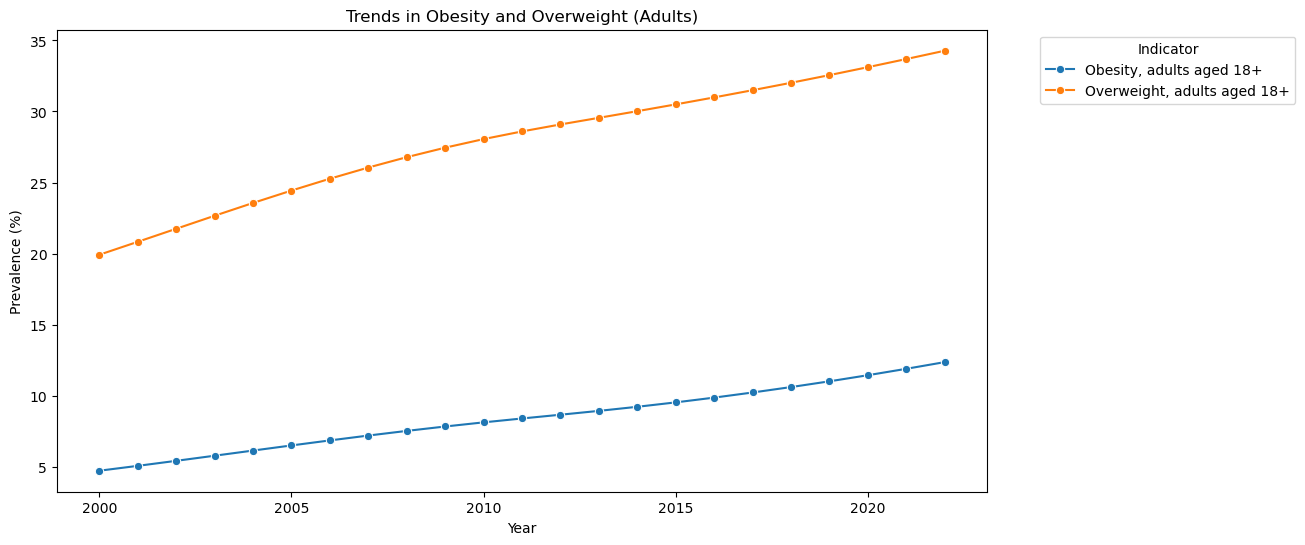

In [64]:
plt.figure(figsize=(12,6))
sns.lineplot(data=trend_df, x='year', y='numeric', hue='indicator_name', marker='o')
plt.title('Trends in Obesity and Overweight (Adults)')
plt.xlabel('Year')
plt.ylabel('Prevalence (%)')
plt.legend(title='Indicator', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [65]:
# Group by year, gender, and indicator#
adult_trends = adult_df.groupby(['year', 'gender', 'indicator_name'])['numeric'].mean().reset_index()
adult_trends.head()

,year,gender,indicator_name,numeric
0,2000,Females,"Obesity, adults aged 18+",6.778051
1,2000,Females,"Overweight, adults aged 18+",24.186243
2,2000,Males,"Obesity, adults aged 18+",2.636523
3,2000,Males,"Overweight, adults aged 18+",15.638573
4,2001,Females,"Obesity, adults aged 18+",7.197028


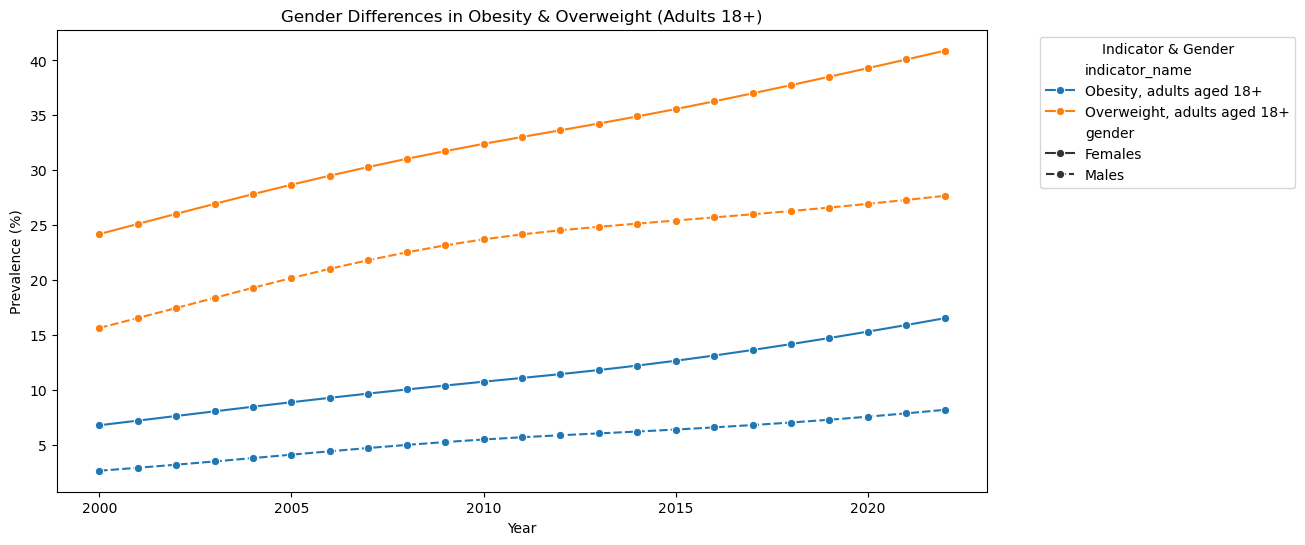

In [66]:
plt.figure(figsize=(12,6))
sns.lineplot(data=adult_trends,x='year', y='numeric',hue='indicator_name', style='gender',marker="o")
plt.title("Gender Differences in Obesity & Overweight (Adults 18+)")
plt.ylabel("Prevalence (%)")
plt.xlabel("Year")
plt.legend(title="Indicator & Gender", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

SALT INTAKE

In [67]:
# Filter only salt intake indicators#
salt_df = df[df['indicator_name'] == 'Mean population salt intake, adults aged 25+'].copy()
# Check unique values#
print(salt_df['gender'].unique())
print(salt_df['year'].min(), salt_df['year'].max())

['Males' 'Females']
2000 2021


In [68]:
salt_summary = (salt_df.groupby(['year','gender'])['numeric'].mean().reset_index())
print(salt_summary.head())

   year   gender  numeric
0  2000  Females   6.2699
1  2000    Males   6.5944
2  2001  Females   6.2512
3  2001    Males   6.5704
4  2002  Females   6.2325


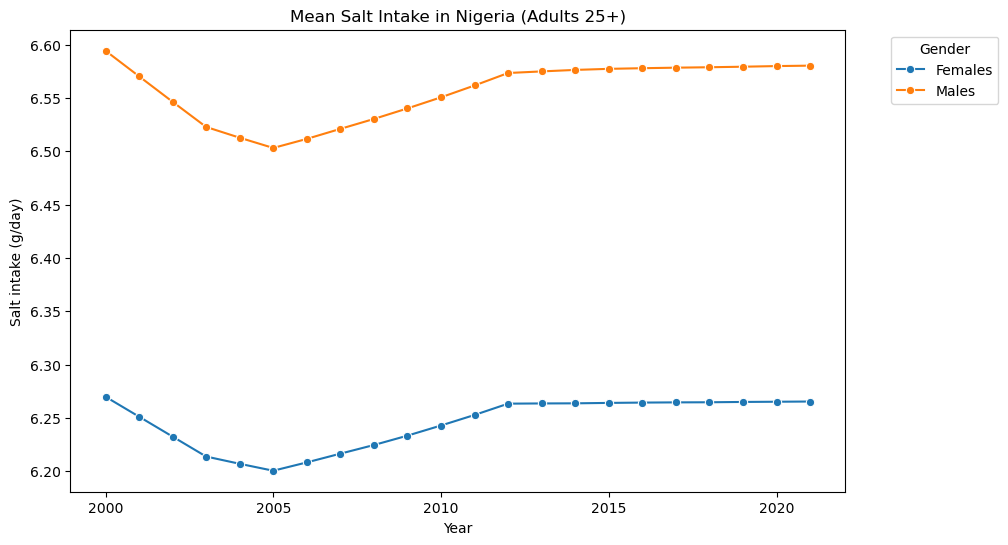

In [69]:
plt.figure(figsize=(10,6))
sns.lineplot(data=salt_summary, x='year', y='numeric', hue='gender', marker='o')
plt.title("Mean Salt Intake in Nigeria (Adults 25+)")
plt.ylabel("Salt intake (g/day)")
plt.xlabel("Year")
plt.legend(title="Gender", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()